import pandas - manipuler des tableaux de données avec les variables (colonnes) et les individus (lignes)
numpy - permet d’effectuer des calculs numériques avec Python.
matplotlib - c'est une librairie qui permet de tracer des graphes 
seaborn - est basée sur Matplotlib, elle fournit différents types de visualisations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     import les fichiers csv avec pd.read_csv ()

In [5]:
sn = pd.read_csv('sous_nutrition.csv')
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [6]:
pop= pd.read_csv('population.csv')
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
aliment = pd.read_csv('dispo_alimentaire.csv')
aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [8]:
aide = pd.read_csv('aide_alimentaire.csv')
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


les questions de Marc:
1- la proportion de personnes en état de sous-nutrition en 2017
table sous_nutrition:
Un fichier d’insécurité alimentaire, qui inclut :
- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour
l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3
années, on peut le résumer en 2013).

In [9]:
sn.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [10]:
sn['Valeur'] = pd.to_numeric(sn['Valeur'],errors='coerce')

In [11]:
sn

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [12]:
sn['Valeur'] = sn['Valeur']*1000000
sn

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


     split() divise une chaîne de caractères en une liste ordonnée de sous-chaînes
     When using expand=True, the split elements will expand out into separate columns
     If ‘coerce’, then invalid parsing will be set as NaN.

In [13]:
sn[['annee1','annee2']] = sn.Année.str.split("-",expand=True)
sn['annee1'] = pd.to_numeric(sn['annee1'],errors='coerce')
sn['annee2'] = pd.to_numeric(sn['annee2'],errors='coerce')
sn.dtypes

Zone       object
Année      object
Valeur    float64
annee1      int64
annee2      int64
dtype: object

    remplace NaN 0

In [14]:
sn['Valeur'].fillna(0, inplace = True)
sn

,Zone,Année,Valeur,annee1,annee2
0,Afghanistan,2012-2014,8600000.0,2012,2014
1,Afghanistan,2013-2015,8800000.0,2013,2015
2,Afghanistan,2014-2016,8900000.0,2014,2016
3,Afghanistan,2015-2017,9700000.0,2015,2017
4,Afghanistan,2016-2018,10500000.0,2016,2018
...,...,...,...,...,...
1213,Zimbabwe,2013-2015,0.0,2013,2015
1214,Zimbabwe,2014-2016,0.0,2014,2016
1215,Zimbabwe,2015-2017,0.0,2015,2017
1216,Zimbabwe,2016-2018,0.0,2016,2018


     Axis 0 will act on all the ROWS in each COLUMN
     Axis 1 will act on all the COLUMNS in each ROW

In [15]:
sn['annee_moyen'] = round(sn[['annee1', 'annee2']].mean(axis=1))
sn

,Zone,Année,Valeur,annee1,annee2,annee_moyen
0,Afghanistan,2012-2014,8600000.0,2012,2014,2013.0
1,Afghanistan,2013-2015,8800000.0,2013,2015,2014.0
2,Afghanistan,2014-2016,8900000.0,2014,2016,2015.0
3,Afghanistan,2015-2017,9700000.0,2015,2017,2016.0
4,Afghanistan,2016-2018,10500000.0,2016,2018,2017.0
...,...,...,...,...,...,...
1213,Zimbabwe,2013-2015,0.0,2013,2015,2014.0
1214,Zimbabwe,2014-2016,0.0,2014,2016,2015.0
1215,Zimbabwe,2015-2017,0.0,2015,2017,2016.0
1216,Zimbabwe,2016-2018,0.0,2016,2018,2017.0


In [16]:
sn['annee_moyen'] =sn['annee_moyen'].astype(int)
sn.dtypes

Zone            object
Année           object
Valeur         float64
annee1           int64
annee2           int64
annee_moyen      int32
dtype: object

In [17]:
sn.head()

,Zone,Année,Valeur,annee1,annee2,annee_moyen
0,Afghanistan,2012-2014,8600000.0,2012,2014,2013
1,Afghanistan,2013-2015,8800000.0,2013,2015,2014
2,Afghanistan,2014-2016,8900000.0,2014,2016,2015
3,Afghanistan,2015-2017,9700000.0,2015,2017,2016
4,Afghanistan,2016-2018,10500000.0,2016,2018,2017


In [18]:
population_sn=sn.loc[sn['annee_moyen']==2017,:]['Valeur'].sum()
population_sn

535700000.0

    table population
    Un fichier de population qui inclut :
    - Le pays.
    - L’année.
    - La population du pays, exprimée en milliers d’habitants

In [19]:
pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [20]:
pop['Valeur'] = pop['Valeur']*1000
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [21]:
population_total=pop.loc[pop['Année']==2017,:]['Valeur'].sum()
population_total

7548134111.0

In [22]:
proportion = round((population_sn/population_total)*100,2)
print('la proportion de personnes en état de sous-nutrition en 2017 est',(proportion), '%')

la proportion de personnes en état de sous-nutrition en 2017 est 7.1 %


    2 le nombre théorique de personnes qui pourraient être nourries
    table dispo_alimentaire
    Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables :
    - Le pays.
    - Le produit.
    - 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités
    bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter
    cependant que la notation kcal est un abus de langage, elle correspond à une calorie
    réelle.
    - 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité
    alimentaire. Elles sont toutes exprimées en milliers de tonnes.
    - Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

In [23]:
aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


    Notes de mes précédentes recherches
    ● La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et
    d'une qualité appropriée pour l’alimentation humaine.
    ● La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.
    ● Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
    les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type :
    A1 + A2 + … = disponibilité intérieure = B1 + B2 + …Mais je ne me souviens plus
    exactement ! Peux tu la retrouver ?

    Disponibilité Alimentaire = Production + Importations -
    Exportations + Variation des Stocks

    Disponibilité pour l’alimentation humaine = Total
    Disponibilité Alimentaire - Alimentation animale - Semences –
    Transformation Alimentaire - Autres Usages – Pertes

In [24]:
aliment.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

    convertir les 10 variables sont exprimées en milliers de tonnes

In [25]:
aliment['Aliments pour animaux'] = aliment['Aliments pour animaux']*1000000
aliment['Aliments pour animaux'].fillna(0, inplace = True)
aliment['Autres Utilisations'] = aliment['Autres Utilisations']*1000000
aliment['Autres Utilisations'].fillna(0, inplace = True)
aliment['Disponibilité intérieure'] = aliment['Disponibilité intérieure']*1000000
aliment['Disponibilité intérieure'].fillna(0, inplace = True)
aliment['Exportations - Quantité'] = aliment['Exportations - Quantité']*1000000
aliment['Exportations - Quantité'].fillna(0, inplace = True)
aliment['Importations - Quantité'] = aliment['Importations - Quantité']*1000000
aliment['Importations - Quantité'].fillna(0, inplace = True)
aliment['Nourriture'] = aliment['Nourriture']*1000000
aliment['Nourriture'].fillna(0, inplace = True)
aliment['Pertes'] = aliment['Pertes']*1000000
aliment['Pertes'].fillna(0, inplace = True)
aliment['Production'] = aliment['Production']*1000000
aliment['Production'].fillna(0, inplace = True)
aliment['Semences'] = aliment['Semences']*1000000
aliment['Semences'].fillna(0, inplace = True)
aliment['Traitement'] = aliment['Traitement']*1000000
aliment['Traitement'].fillna(0, inplace = True)
aliment['Variation de stock'] = aliment['Variation de stock']*1000000
aliment['Variation de stock'].fillna(0, inplace = True)
aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


    jointure entre 2 dataframes dispo_aliment et population

In [26]:
aliment_pop=pd.merge(aliment, pop, on='Zone')
aliment_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2013,32269589.0
1,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2014,33370794.0
2,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2015,34413603.0
3,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2016,35383032.0
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0


In [27]:
aliment_pop_2017=aliment_pop.loc[aliment_pop['Année']==2017,:]
aliment_pop_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [28]:
aliment_pop_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 4 to 92494
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15416 non-null  object 
 1   Produit                                                        15416 non-null  object 
 2   Origine                                                        15416 non-null  object 
 3   Aliments pour animaux                                          15416 non-null  float64
 4   Autres Utilisations                                            15416 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14076 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         13852 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [29]:
aliment_pop_2017['dispo_kcal'] = aliment_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * aliment_pop_2017['Valeur'] * 365
aliment_pop_2017

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\440174677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aliment_pop_2017['dispo_kcal'] = aliment_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * aliment_pop_2017['Valeur'] * 365


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0,6.624041e+10
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92470,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,...,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,2017,636039.0,1.044694e+10
92476,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,2.553697e+09
92482,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,NaN,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00
92488,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00


In [30]:
total_dispo_kcal=aliment_pop_2017['dispo_kcal'].sum()
total_dispo_kcal

7635429388975815.0

https://www.fao.org/3/x8200e/x8200e03.htm
moyen Approximate daily energy requirement for adults = 2500 kcal

In [31]:
person_nouri=total_dispo_kcal/365/2500

In [32]:
print('le nombre théorique de personnes qui pourraient être nourries est', round(person_nouri))

le nombre théorique de personnes qui pourraient être nourries est 8367593851


    idem pour la disponibilité alimentaire des produits végétaux

In [33]:
aliment_pop_2017_vege=aliment_pop_2017.loc[aliment_pop_2017['Origine']=='vegetale',:]
aliment_pop_2017_vege.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10
40,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,NaN,0.00,3000000.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00


In [34]:
aliment_pop_2017_vege['dispo_kcal_vege'] = aliment_pop_2017_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * aliment_pop_2017_vege['Valeur'] * 365
aliment_pop_2017_vege.head()

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\1981157663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aliment_pop_2017_vege['dispo_kcal_vege'] = aliment_pop_2017_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * aliment_pop_2017_vege['Valeur'] * 365


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal,dispo_kcal_vege
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10,1.324808e+10
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10,1.324808e+10
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00,0.000000e+00
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10,5.299232e+10
40,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,NaN,0.00,3000000.0,...,3000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00,0.000000e+00


In [35]:
total_dispo_kcal_vege=aliment_pop_2017_vege['dispo_kcal'].sum()
total_dispo_kcal_vege

6300178937197865.0

In [36]:
print('le nombre théorique de personnes qui pourraient être nourries avec les produits végétaux est', round(total_dispo_kcal_vege/365/2500))

le nombre théorique de personnes qui pourraient être nourries avec les produits végétaux est 6904305685


l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions.
Note Julien:
Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales,
notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation
pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet
Bilans alimentaires, sur le lien juste ci-dessus. Peux-tu approfondir ce point ?
https://www.fao.org/faostat/fr/#data/FBS

In [37]:
cereales= ['Avoine','Blé','Riz (Eq Blanchi)','Céréales, Autres','Maïs','Millet','Orge','Seigle','Sorgho']
aliment_pop_2017_cereal=aliment_pop_2017.loc[aliment_pop_2017['Produit'].isin(cereales),:]
aliment_pop_2017_cereal

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_kcal
46,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017,36296113.0,1.813662e+13
76,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
196,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2017,36296113.0,2.782097e+11
208,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2017,36296113.0,3.974424e+10
244,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2017,36296113.0,3.444501e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92140,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,636039.0,0.000000e+00
92278,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017,636039.0,2.321542e+08
92320,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,NaN,0.01,1.000000e+06,...,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0,2017,636039.0,0.000000e+00
92416,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,...,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0,2017,636039.0,1.446321e+11


In [38]:
cereale_group_poportion_animal1=100*aliment_pop_2017_cereal['Aliments pour animaux'].sum()/aliment_pop_2017_cereal['Disponibilité intérieure'].sum()
cereale_group_poportion_animal1

36.14301553458228

In [39]:
print ('la répartition l’alimentation  pour animaux est', round(cereale_group_poportion_animal1),'%')

la répartition l’alimentation  pour animaux est 36 %


In [40]:
cereale_group_poportion_humaine2=100*aliment_pop_2017_cereal['Nourriture'].sum()/aliment_pop_2017_cereal['Disponibilité intérieure'].sum()
cereale_group_poportion_humaine2

42.90600583340446

In [41]:
print ('la répartition l’alimentation humaine (colonne Nourriture) est', round(cereale_group_poportion_humaine2),'%')

la répartition l’alimentation humaine (colonne Nourriture) est 43 %


    2 ème methode calcul avec groupbay pour les mêmes results: 

In [42]:
cereale_group=aliment_pop_2017_cereal.groupby(['Produit'])['Aliments pour animaux','Nourriture','Disponibilité intérieure'].sum()
cereale_group

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\3015767784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cereale_group=aliment_pop_2017_cereal.groupby(['Produit'])['Aliments pour animaux','Nourriture','Disponibilité intérieure'].sum()


,Aliments pour animaux,Nourriture,Disponibilité intérieure
Produit,,,
Avoine,1.586500e+10,3.459000e+09,2.253700e+10
Blé,1.216860e+11,4.505810e+11,6.616670e+11
"Céréales, Autres",1.878200e+10,5.308000e+09,2.719300e+10
Maïs,5.447460e+11,1.250000e+11,9.532020e+11
Millet,3.290000e+09,2.304000e+10,2.989400e+10
Orge,8.879800e+10,6.744000e+09,1.341520e+11
Riz (Eq Blanchi),3.358100e+10,3.768300e+11,4.751410e+11
Seigle,8.073000e+09,5.349000e+09,1.636200e+10
Sorgho,2.479400e+10,2.415300e+10,5.822300e+10


In [43]:
cereale_group_poportion_animal=100*cereale_group['Aliments pour animaux'].sum()/cereale_group['Disponibilité intérieure'].sum()
cereale_group_poportion_animal

36.14301553458228

In [44]:
cereale_group_poportion_humaine=100*cereale_group['Nourriture'].sum()/cereale_group['Disponibilité intérieure'].sum()
cereale_group_poportion_humaine

42.90600583340446

Question Mélanie: Je souhaiterais avoir une étude un peu plus fine pour chacun des pays. Par exemple, j’aimerais que tu puisses nous donner les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017, ceux qui ont le plus bénéficié d’aide depuis 2013, ceux ayant le plus/le moins de disponibilité/habitant, etc., et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.

    la proportion de personnes sous-alimentées est la plus forte en 2017 table population et table sous_nutrition

In [45]:
pop_2017=pop.loc[pop["Année"]==2017,:]
pop_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [46]:
sn1 = sn[['Zone', 'annee_moyen','Valeur']]
sn_2017=sn1.loc[sn1['annee_moyen']==2017,:]
sn_2017['Valeur'].fillna(0, inplace = True)
sn_2017

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\3752697425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sn_2017['Valeur'].fillna(0, inplace = True)


,Zone,annee_moyen,Valeur
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8000000.0
1198,Viet Nam,2017,6500000.0
1204,Yémen,2017,0.0
1210,Zambie,2017,0.0


In [47]:
sn_2017.rename(columns={'Valeur':'Population sous-alimentation'}, inplace=True)
sn_2017.head()

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\1253769694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sn_2017.rename(columns={'Valeur':'Population sous-alimentation'}, inplace=True)


,Zone,annee_moyen,Population sous-alimentation
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0


In [48]:
sn_pop=pd.merge(sn_2017,pop_2017,on="Zone")
sn_pop.head()

,Zone,annee_moyen,Population sous-alimentation,Année,Valeur
0,Afghanistan,2017,10500000.0,2017,36296113.0
1,Afrique du Sud,2017,3100000.0,2017,57009756.0
2,Albanie,2017,100000.0,2017,2884169.0
3,Algérie,2017,1300000.0,2017,41389189.0
4,Allemagne,2017,0.0,2017,82658409.0


In [49]:
sn_pop['proportion']=sn_pop["Population sous-alimentation"]/sn_pop['Valeur']*100
sn_pop

,Zone,annee_moyen,Population sous-alimentation,Année,Valeur,proportion
0,Afghanistan,2017,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2017,3100000.0,2017,57009756.0,5.437666
2,Albanie,2017,100000.0,2017,2884169.0,3.467203
3,Algérie,2017,1300000.0,2017,41389189.0,3.140917
4,Allemagne,2017,0.0,2017,82658409.0,0.000000
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,2017,29402484.0,27.208586
199,Viet Nam,2017,6500000.0,2017,94600648.0,6.870989
200,Yémen,2017,0.0,2017,27834819.0,0.000000
201,Zambie,2017,0.0,2017,16853599.0,0.000000


In [50]:
proportion_sous_aliment=sn_pop.sort_values(by=['proportion'], ascending=False)
proportion_sous_aliment_TOP10=proportion_sous_aliment.head(10)
proportion_sous_aliment_TOP10

,Zone,annee_moyen,Population sous-alimentation,Année,Valeur,proportion
78,Haïti,2017,5300000.0,2017,10982366.0,48.259182
157,République populaire démocratique de Corée,2017,12000000.0,2017,25429825.0,47.188685
108,Madagascar,2017,10500000.0,2017,25570512.0,41.062924
103,Libéria,2017,1800000.0,2017,4702226.0,38.279742
100,Lesotho,2017,800000.0,2017,2091534.0,38.249438
183,Tchad,2017,5700000.0,2017,15016753.0,37.957606
161,Rwanda,2017,4200000.0,2017,11980961.0,35.055619
121,Mozambique,2017,9400000.0,2017,28649018.0,32.810898
186,Timor-Leste,2017,400000.0,2017,1243258.0,32.173531
0,Afghanistan,2017,10500000.0,2017,36296113.0,28.928718


Text(0, 0.5, 'Taux %')

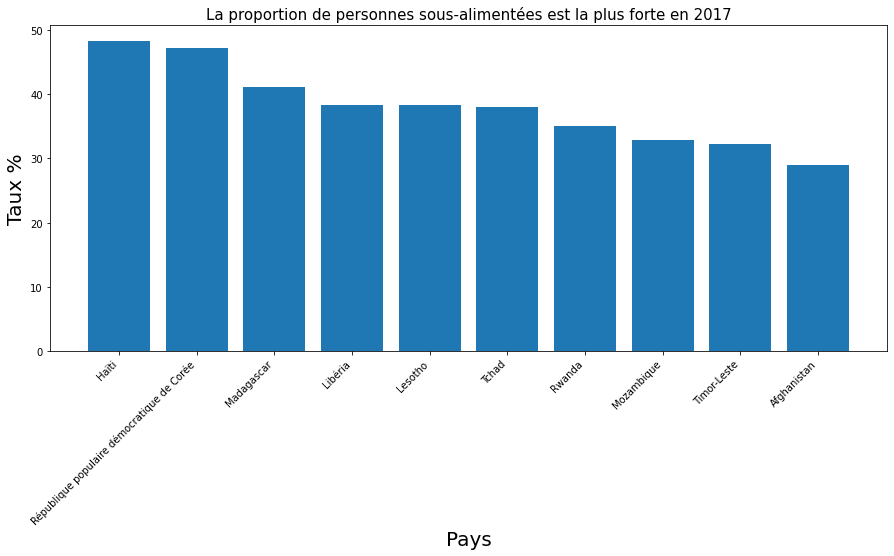

In [51]:
plt.figure(figsize=(15,6))
plt.bar(height=proportion_sous_aliment_TOP10['proportion'],x=proportion_sous_aliment_TOP10['Zone'])
plt.xticks(rotation=45, ha='right')
plt.title("La proportion de personnes sous-alimentées est la plus forte en 2017",fontsize=15)
plt.xlabel("Pays",fontsize=20)
plt.ylabel("Taux %",fontsize=20)

      pays qui ont le plus bénéficié d’aide depuis 2013

In [52]:
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [53]:
aide.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [54]:
aide.rename(columns = {'Pays bénéficiaire':'Zone'}, inplace = True)
aide.rename(columns = {'Valeur':'quantity_aide_tonne'}, inplace = True)
aide.head()

,Zone,Année,Produit,quantity_aide_tonne
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [55]:
aide_pays=aide[["Zone","quantity_aide_tonne"]].groupby(["Zone"],as_index=False).sum().sort_values(by='quantity_aide_tonne',ascending=False).head(10)
aide_pays

,Zone,quantity_aide_tonne
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


In [56]:
aide_pays.dtypes

Zone                   object
quantity_aide_tonne     int64
dtype: object

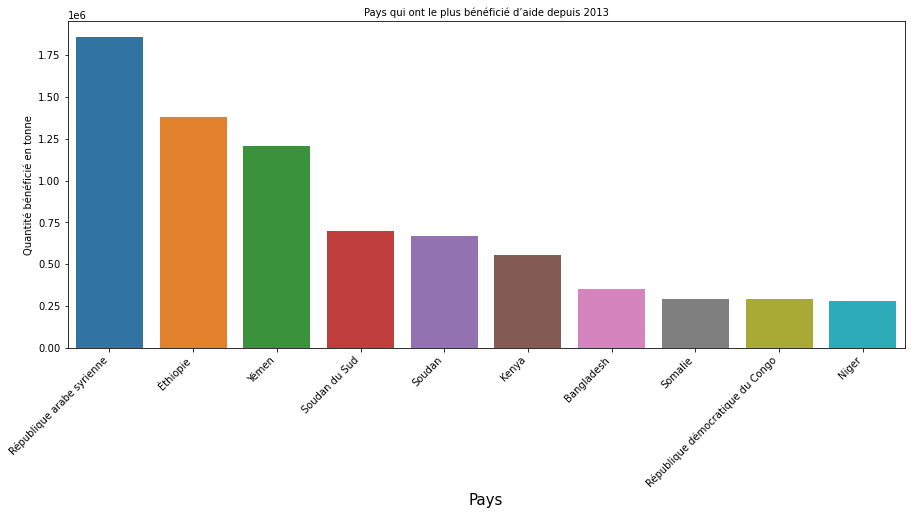

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(data=aide_pays, x='Zone', y='quantity_aide_tonne')
plt.title("Pays qui ont le plus bénéficié d’aide depuis 2013",fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Pays",fontsize=15)
yticks=plt.ylabel("Quantité bénéficié en tonne",fontsize=10)

    Les pays ayant le plus/le moins de disponibilité/habitant

In [58]:
da = pd.read_csv('dispo_alimentaire.csv')
da.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [59]:
dispo_alimentaire= da[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone',as_index=False).sum()
dispo_alimentaire

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [60]:
pays_moins_dispo=dispo_alimentaire.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)",ascending=True).head(10)
pays_moins_dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


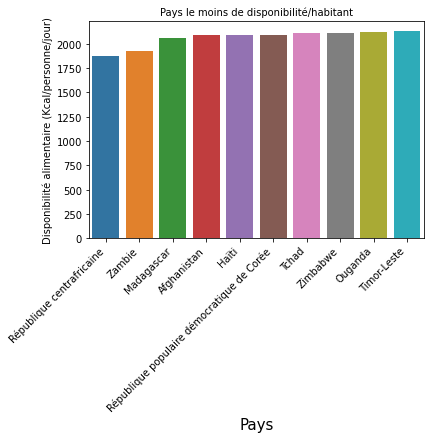

In [61]:
sns.barplot(data=pays_moins_dispo, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Pays le moins de disponibilité/habitant",fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Pays",fontsize=15)
yticks=plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)",fontsize=10)

In [62]:
pays_plus_dispo= dispo_alimentaire.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)
pays_plus_dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


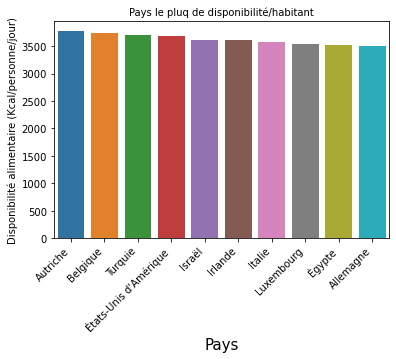

In [63]:
sns.barplot(data=pays_plus_dispo, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Pays le pluq de disponibilité/habitant",fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Pays",fontsize=15)
yticks=plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)",fontsize=10)

    Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait l’exportation par rapport à la production… Peux-tu jeter un coup d’œil et nous faire un retour?

In [64]:
am1=aliment.loc[(aliment['Zone']=='Thaïlande')&(aliment['Produit']=='Manioc')]
am1

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [65]:
am1['taux_exportation']=am1['Exportations - Quantité']/am1['Production']*100
am1

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\2675738456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am1['taux_exportation']=am1['Exportations - Quantité']/am1['Production']*100


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,taux_exportation
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,83.41273


    Le taux d'exportation manioc est de 83%

In [66]:
sn_pop.head()

,Zone,annee_moyen,Population sous-alimentation,Année,Valeur,proportion
0,Afghanistan,2017,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2017,3100000.0,2017,57009756.0,5.437666
2,Albanie,2017,100000.0,2017,2884169.0,3.467203
3,Algérie,2017,1300000.0,2017,41389189.0,3.140917
4,Allemagne,2017,0.0,2017,82658409.0,0.000000


In [67]:
am2=sn_pop.loc[(sn_pop['Zone']=='Thaïlande')&(sn_pop['Année']==2017)]
am2

,Zone,annee_moyen,Population sous-alimentation,Année,Valeur,proportion
185,Thaïlande,2017,6200000.0,2017,69209810.0,8.958268


    La proportion sous nutrion est de 8.96%

In [68]:
am3=pd.merge(am1,am2, on='Zone')
am3

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Production,Semences,Traitement,Variation de stock,taux_exportation,annee_moyen,Population sous-alimentation,Année,Valeur,proportion
0,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,...,3.022800e+10,0.0,0.0,0.0,83.41273,2017,6200000.0,2017,69209810.0,8.958268


    https://devsante.org/articles/le-manioc 125 à 140 Kcal pour 100 g de manioc frais et pelé.soit 0,13 Kcal

In [69]:
am3['am_export']=am3['Exportations - Quantité']*0.13/2500
am3['am_animaux']=am3['Aliments pour animaux']*0.13/2500
am3["am_production"]=am3['Production']*0.13/2500
am3['am_importation']=am3['Importations - Quantité']*0.13/2500
am3['am_dispo']=am3['Disponibilité intérieure']*0.13/2500
am3

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,annee_moyen,Population sous-alimentation,Année,Valeur,proportion,am_export,am_animaux,am_production,am_importation,am_dispo
0,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,...,2017,6200000.0,2017,69209810.0,8.958268,1311128.0,93600.0,1571856.0,65000.0,325728.0


In [70]:
am4= am3[['Zone','Produit','proportion',"Population sous-alimentation",'Valeur','am_export','am_animaux','am_production','am_importation','am_dispo','taux_exportation']]
am4

,Zone,Produit,proportion,Population sous-alimentation,Valeur,am_export,am_animaux,am_production,am_importation,am_dispo,taux_exportation
0,Thaïlande,Manioc,8.958268,6200000.0,69209810.0,1311128.0,93600.0,1571856.0,65000.0,325728.0,83.41273


In [71]:
am4['taux_sn_sans_export']=(am4['Population sous-alimentation']-am4['am_export'])/am4['Valeur']*100
am4['taux_sn_humaine']=(am4['Population sous-alimentation']-am4['am_export']-am4['am_animaux'])/am4['Valeur']*100
am4

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\1065401174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am4['taux_sn_sans_export']=(am4['Population sous-alimentation']-am4['am_export'])/am4['Valeur']*100
C:\Users\ai.ge\AppData\Local\Temp\ipykernel_11492\1065401174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am4['taux_sn_humaine']=(am4['Population sous-alimentation']-am4['am_export']-am4['am_animaux'])/am4['Valeur']*100


,Zone,Produit,proportion,Population sous-alimentation,Valeur,am_export,am_animaux,am_production,am_importation,am_dispo,taux_exportation,taux_sn_sans_export,taux_sn_humaine
0,Thaïlande,Manioc,8.958268,6200000.0,69209810.0,1311128.0,93600.0,1571856.0,65000.0,325728.0,83.41273,7.063843,6.928602


    resultat: La Tahilande esport 83% de sa production Manioc, sans exportation, produit manioc peut nourir 1 311 128 personnes de plus en Thailande.
    Le taux des personne sous noutrition est actuelelemnt 8.96%, ce taux sera diminué à 7% sans l'exportation de manioc, ce taux pourra encore diminuer jusqu'à 6.9% si on suppirmer l'utilisation manioc pour les animaux